In [5]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as sm

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats as stats

In [6]:
df = pd.read_csv("DC_Properties.csv")
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          158957 non-null  int64  
 1   BATHRM              158957 non-null  int64  
 2   HF_BATHRM           158957 non-null  int64  
 3   HEAT                158957 non-null  object 
 4   AC                  158957 non-null  object 
 5   NUM_UNITS           106696 non-null  float64
 6   ROOMS               158957 non-null  int64  
 7   BEDRM               158957 non-null  int64  
 8   AYB                 158686 non-null  float64
 9   YR_RMDL             80928 non-null   float64
 10  EYB                 158957 non-null  int64  
 11  STORIES             106652 non-null  float64
 12  SALEDATE            132187 non-null  object 
 13  PRICE               98216 non-null   float64
 14  QUALIFIED           158957 non-null  object 
 15  SALE_NUM            158957 non-nul

In [10]:
df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


<AxesSubplot:xlabel='BATHRM', ylabel='Count'>

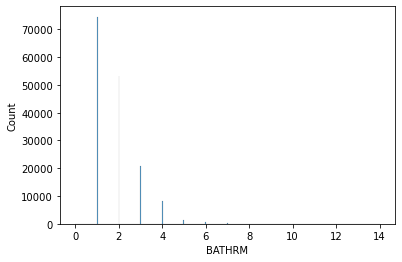

In [5]:
sns.histplot(df["BATHRM"], kde = False)

<AxesSubplot:xlabel='PRICE', ylabel='Count'>

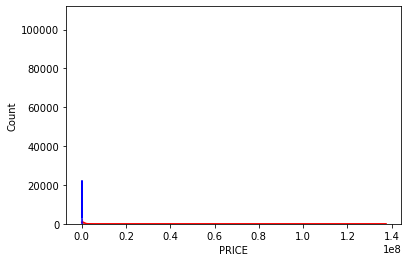

In [8]:
sns.histplot(df['PRICE'], color = "red", label = "PRICE", kde=True) 
sns.histplot(df['STORIES'], color ="blue", label = "STORIES", kde=True)

<AxesSubplot:xlabel='BEDRM', ylabel='Density'>

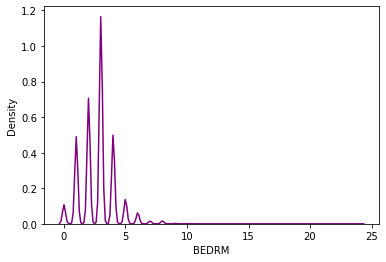

In [11]:
sns.kdeplot(df['BEDRM'], shade = False, color = "purple")

In [17]:
df.corr()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
Unnamed: 0,1.000000,-0.378389,-0.358454,-0.051664,-0.585978,-0.598538,0.438398,-0.115391,-0.133335,-0.043577,...,0.299741,-0.207757,0.097378,0.027510,0.141489,-0.210494,0.106993,0.161255,0.106642,-0.211284
BATHRM,-0.378389,1.000000,0.248759,0.403431,0.677751,0.655563,-0.039087,0.239797,0.269444,0.042349,...,0.121070,0.287648,0.213538,0.717903,-0.063410,0.130588,-0.184810,-0.196311,-0.184997,0.129822
HF_BATHRM,-0.358454,0.248759,1.000000,-0.151393,0.353825,0.375568,-0.009372,0.148483,0.235645,0.033270,...,-0.229586,0.212534,0.057939,0.484198,-0.020164,0.126221,-0.058719,-0.072888,-0.058819,0.126238
NUM_UNITS,-0.051664,0.403431,-0.151393,1.000000,0.524724,0.330551,-0.104280,-0.015551,-0.069551,0.019268,...,0.797330,-0.038679,NaN,NaN,-0.099460,-0.117125,0.037280,0.060408,0.037291,-0.117025
ROOMS,-0.585978,0.677751,0.353825,0.524724,1.000000,0.841309,-0.219367,0.161396,0.158847,0.039352,...,-0.042795,0.348184,0.049562,0.761722,-0.053109,0.120238,0.006756,-0.075593,0.006399,0.119712
BEDRM,-0.598538,0.655563,0.375568,0.330551,0.841309,1.000000,-0.242955,0.214655,0.168913,0.040859,...,-0.131676,0.321066,0.146936,0.721204,-0.071962,0.144971,0.028338,-0.072028,0.028024,0.144723
AYB,0.438398,-0.039087,-0.009372,-0.104280,-0.219367,-0.242955,1.000000,0.021678,0.660668,-0.011098,...,0.078079,-0.040503,0.201515,0.117381,0.175098,-0.122697,0.032979,0.115762,0.033361,-0.122607
YR_RMDL,-0.115391,0.239797,0.148483,-0.015551,0.161396,0.214655,0.021678,1.000000,0.256227,-0.001643,...,-0.094586,0.049021,0.546581,0.118424,-0.098040,0.044246,0.145658,0.069060,0.145585,0.044158
EYB,-0.133335,0.269444,0.235645,-0.069551,0.158847,0.168913,0.660668,0.256227,1.000000,0.040214,...,-0.059968,0.081796,0.246490,0.109064,0.041599,-0.082219,0.005107,0.036704,0.005332,-0.082212
STORIES,-0.043577,0.042349,0.033270,0.019268,0.039352,0.040859,-0.011098,-0.001643,0.040214,1.000000,...,0.020700,-0.009711,NaN,NaN,-0.026886,-0.003654,-0.031842,-0.025058,-0.031842,-0.003597


In [18]:
df.max()

C:\Users\RVHU32~1\AppData\Local\Temp/ipykernel_1844/1151452817.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.max()


Unnamed: 0                        158956
BATHRM                                14
HF_BATHRM                             11
HEAT                      Water Base Brd
AC                                     Y
NUM_UNITS                            6.0
ROOMS                                 48
BEDRM                                 24
AYB                               2019.0
YR_RMDL                           2019.0
EYB                                 2018
STORIES                            826.0
PRICE                        137427545.0
QUALIFIED                              U
SALE_NUM                              15
GBA                              45384.0
BLDG_NUM                               5
KITCHENS                            44.0
FIREPLACES                        293920
USECODE                              117
LANDAREA                          942632
GIS_LAST_MOD_DTTM    2018-07-22 18:01:43
SOURCE                       Residential
CMPLX_NUM                         5621.0
LIVING_GBA      

In [7]:
df.max()

C:\Users\RVHU32~1\AppData\Local\Temp/ipykernel_4692/1151452817.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.max()


Unnamed: 0                        158956
BATHRM                                14
HF_BATHRM                             11
HEAT                      Water Base Brd
AC                                     Y
NUM_UNITS                            6.0
ROOMS                                 48
BEDRM                                 24
AYB                               2019.0
YR_RMDL                           2019.0
EYB                                 2018
STORIES                            826.0
PRICE                        137427545.0
QUALIFIED                              U
SALE_NUM                              15
GBA                              45384.0
BLDG_NUM                               5
KITCHENS                            44.0
FIREPLACES                        293920
USECODE                              117
LANDAREA                          942632
GIS_LAST_MOD_DTTM    2018-07-22 18:01:43
SOURCE                       Residential
CMPLX_NUM                         5621.0
LIVING_GBA      

In [19]:
df.min()

C:\Users\RVHU32~1\AppData\Local\Temp/ipykernel_1844/3962516015.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.min()


Unnamed: 0                             0
BATHRM                                 0
HF_BATHRM                              0
HEAT                          Air Exchng
AC                                     0
NUM_UNITS                            0.0
ROOMS                                  0
BEDRM                                  0
AYB                               1754.0
YR_RMDL                             20.0
EYB                                 1800
STORIES                              0.0
PRICE                                1.0
QUALIFIED                              Q
SALE_NUM                               1
GBA                                  0.0
BLDG_NUM                               1
KITCHENS                             0.0
FIREPLACES                             0
USECODE                               11
LANDAREA                               0
GIS_LAST_MOD_DTTM    2018-07-22 18:01:38
SOURCE                       Condominium
CMPLX_NUM                         1001.0
LIVING_GBA      

In [ ]:
df["ROOMS"].min()

In [ ]:
df["PRICE"].sum()

In [20]:
df[""].mean()

C:\Users\RVHU32~1\AppData\Local\Temp/ipykernel_1844/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Unnamed: 0       79478.000000
BATHRM               1.810678
HF_BATHRM            0.458237
NUM_UNITS            1.198039
ROOMS                6.187736
BEDRM                2.732506
AYB               1941.987579
YR_RMDL           1998.243537
EYB               1963.718024
STORIES              2.091793
PRICE           931351.594934
SALE_NUM             1.680033
GBA               1714.539889
BLDG_NUM             1.000598
KITCHENS             1.219251
FIREPLACES           2.374674
USECODE             14.252999
LANDAREA          2473.282158
CMPLX_NUM         2371.544249
LIVING_GBA         888.834542
ZIPCODE          20012.694563
LATITUDE            38.914854
LONGITUDE          -77.016676
CENSUS_TRACT      5348.216324
X                  -77.016712
Y                   38.914846
dtype: float64

In [26]:
df["NUM_UNITS"].mean()

1.1980392891954712

In [27]:
df["NUM_UNITS"].median()

1.0

In [14]:
df["NUM_UNITS"].min()

0.0

In [22]:
df.mode()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,1.0,0.0,Forced Air,Y,1.0,6.0,3.0,1900.0,2006.0,...,-77.084688,Old City 2,040 D Old City 2,5500.0,009000 1001,Ward 6,540,-77.084691,38.934676,NW
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158952,158952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158953,158953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158954,158954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158955,158955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df["HF_BATHRM"].mode()

0    0
dtype: int64

In [28]:
df["NUM_UNITS"].mode()

0    1.0
dtype: float64

In [29]:
df.isnull().sum()

Unnamed: 0                 0
BATHRM                     0
HF_BATHRM                  0
HEAT                       0
AC                         0
NUM_UNITS              52261
ROOMS                      0
BEDRM                      0
AYB                      271
YR_RMDL                78029
EYB                        0
STORIES                52305
SALEDATE               26770
PRICE                  60741
QUALIFIED                  0
SALE_NUM                   0
GBA                    52261
BLDG_NUM                   0
STYLE                  52261
STRUCT                 52261
GRADE                  52261
CNDTN                  52261
EXTWALL                52261
ROOF                   52261
INTWALL                52261
KITCHENS               52262
FIREPLACES                 0
USECODE                    0
LANDAREA                   0
GIS_LAST_MOD_DTTM          0
SOURCE                     0
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS            52917
CITY          

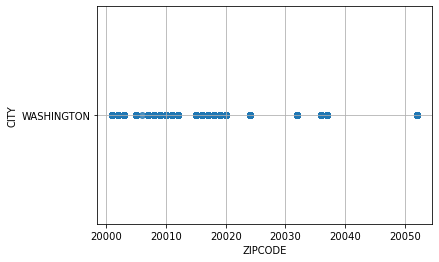

In [32]:
sns.regplot(x = df["ZIPCODE"], y = df["CITY"], fit_reg = False)

plt.grid()

In [31]:
df["HF_BATHRM"].mean()

0.4582371333127827

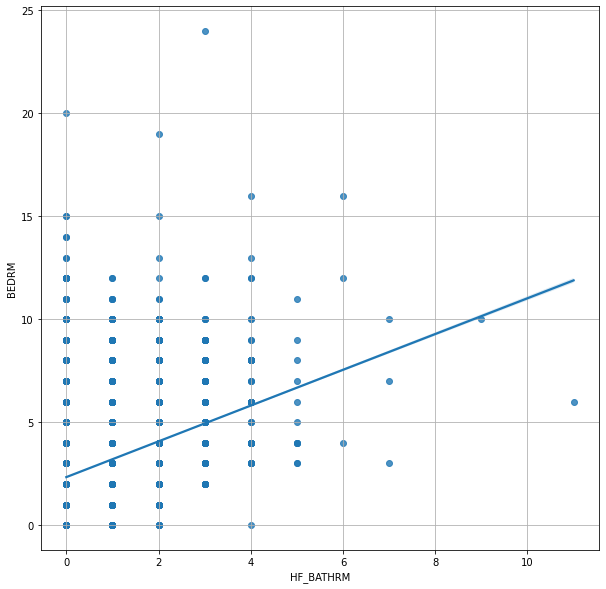

In [34]:
plt.figure(figsize=(10,10))

sns.regplot(x = df["HF_BATHRM"], y = df["BEDRM"], fit_reg = True)

plt.grid()

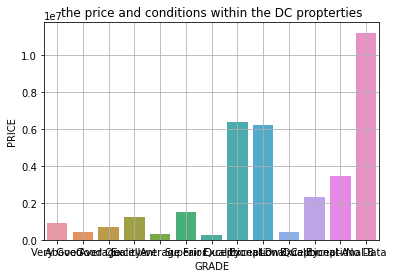

In [16]:
sns.barplot(data = df, x = "GRADE", y = "PRICE", ci = None)

plt.title('the price and conditions within the DC propterties')
plt.grid()

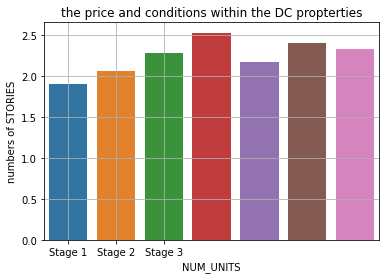

In [9]:
sns.barplot(data = df, x = "NUM_UNITS", y = "STORIES", ci = None)

### change the axis labels

plt.xticks(ticks = [0,1,2], labels = ["Stage 1", "Stage 2", "Stage 3"])

### change the axis labels

plt.xlabel("NUM_UNITS")
plt.ylabel("numbers of STORIES")

### add title and grid lines
plt.title('the price and conditions within the DC propterties')
plt.grid()

Text(0.5, 1.0, 'the price and conditions within the DC propterties')

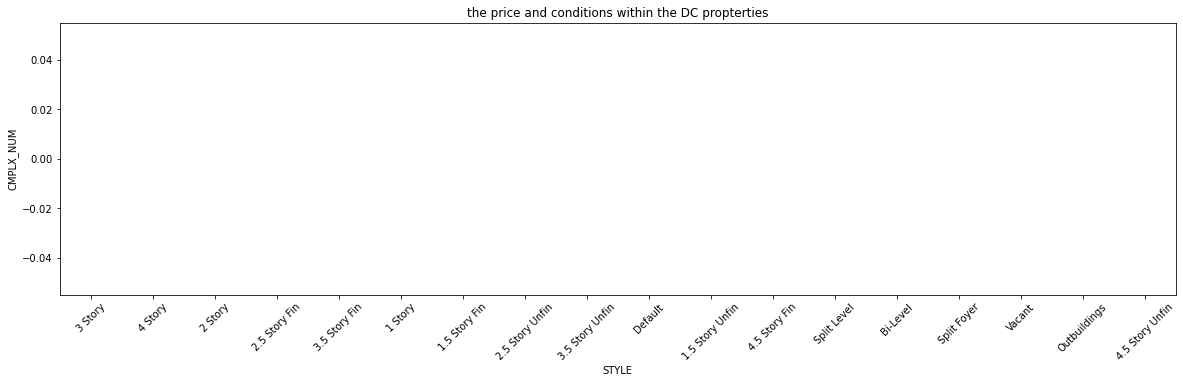

In [13]:
plt.figure(figsize=(20,5))

sns.barplot(data = df, x = "STYLE", y = "CMPLX_NUM", ci = None)

plt.xticks(rotation = 45)
plt.title('the price and conditions within the DC propterties')

Text(0.5, 1.0, 'the price and conditions within the DC propterties')

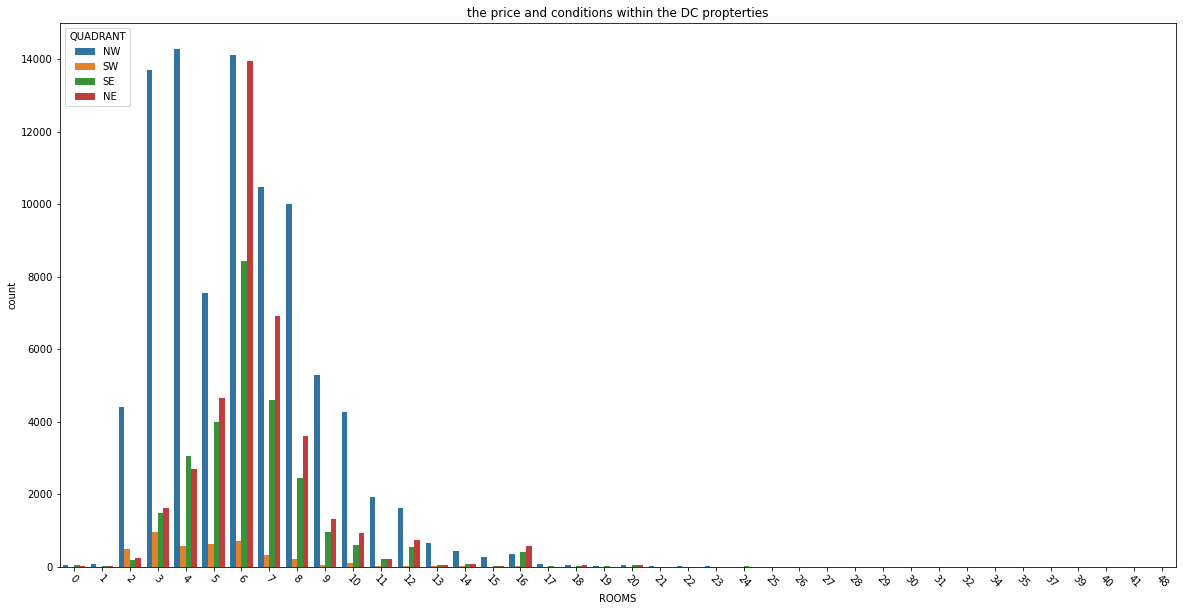

In [17]:
plt.figure(figsize=(20,10))

sns.countplot(data = df, x = "ROOMS", hue = "QUADRANT")

plt.xticks(rotation = -45)
plt.title('the price and conditions within the DC propterties')